In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/joshuasir/datasets/main/all_agree_sampled.csv')

In [16]:
df,df_unseen = train_test_split(df,stratify=df['label_score'],test_size=.2,random_state=42).drop()

In [43]:
df.head().iloc[: , 1:]

,title,label,label_score,len_title
4999,"Marah Besar Karena Pangeran William Selingkuh,...",clickbait,1,12
1061,Video Detik-detik Anggota DPD RI Nyaris Baku H...,clickbait,1,11
733,4 Fakta soal Sakitnya BJ Habibie,clickbait,1,6
2692,Pesan Malaikat: Rejeki Akan Berlimpah Hari Ini,clickbait,1,7
3141,Bencana Asap dan Kebakaran Hutan Telah Coreng ...,non-clickbait,0,10


In [18]:
dist = df.groupby(by='label_score').count()

In [44]:
dist.iloc[: , 1:]

,title,label,len_title
label_score,,,
0,2122,2122,2122
1,2122,2122,2122


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


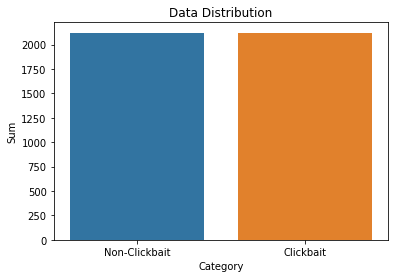

In [21]:
datadistribution = sns.barplot(["Non-Clickbait","Clickbait"],dist['label'])
plt.title("Data Distribution")
plt.xlabel("Category")
plt.ylabel("Sum")
plt.show()
datadistribution.get_figure().savefig('data-distirbution.png')

In [22]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import *
import string
from wordcloud import WordCloud

In [23]:
import requests

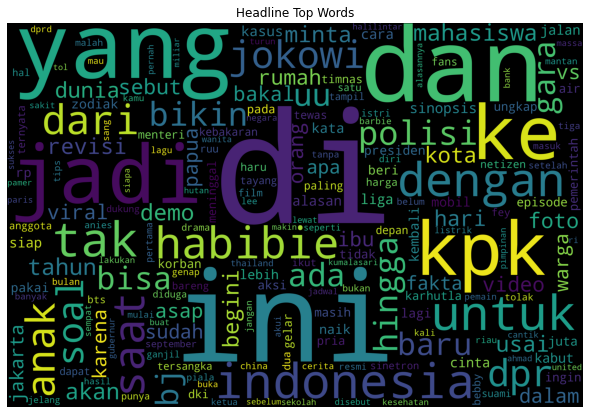

In [24]:
def word_cloud(series,title=''):
    input_words =''
    series = series.astype('string')

    for i in series:
        words = i.split(' ')
        input_words +=  " ".join([words[j].lower().strip(string.punctuation) for j in range(len(words))])+" "

    wordcloud = WordCloud(width = 3000, 
                          height = 2000,
                          random_state=1,  
                          collocations=False).generate(input_words)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title)
    wordcloud.to_file(title+'.png')
    plt.show()

word_cloud(df.title,title = 'Headline Top Words')


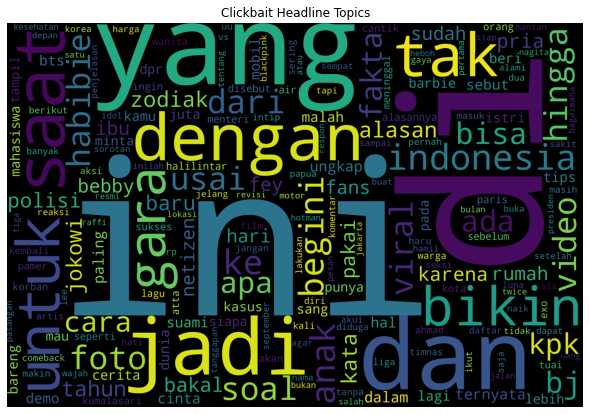

In [25]:
word_cloud(df[df['label_score']==1].title,title = 'Clickbait Headline Topics')

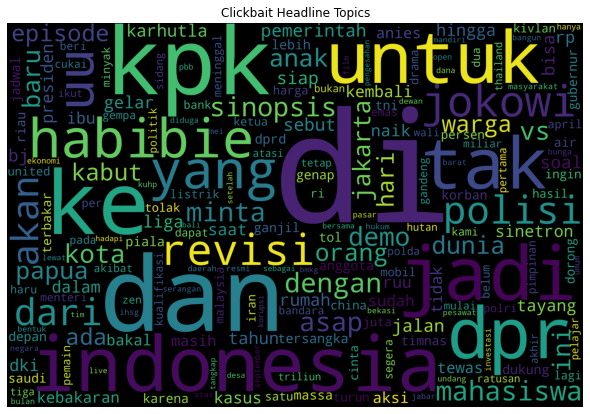

In [26]:
word_cloud(df[df['label_score']==0].title,title = 'Clickbait Headline Topics')

top word are mostly stop words

In [27]:
master = "https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt"
req = requests.get(master)

In [28]:
stopwords = req.text.splitlines()

In [29]:
def word_cloud(series,title=''):
    input_words =''
    series = series.astype('string')

    for i in series:
        words = i.split(' ')
        input_words +=  " ".join([words[j].lower().strip(string.punctuation) for j in range(len(words)) if words[j].lower().strip(string.punctuation) not in stopwords])+" "

    wordcloud = WordCloud(width = 3000, 
                          height = 2000,
                          random_state=1,  
                          collocations=False).generate(input_words)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title)
    wordcloud.to_file(title+'.png')
    plt.show()

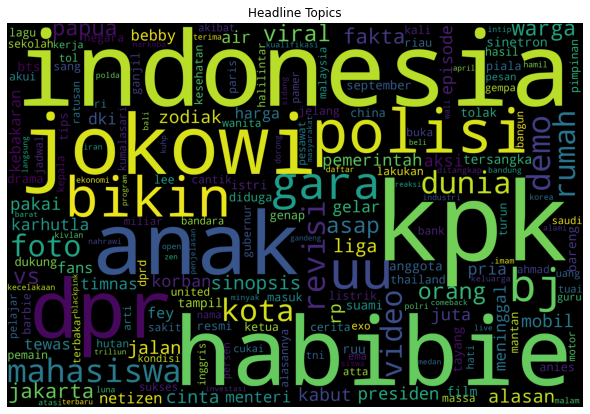

In [30]:
word_cloud(df.title,title = 'Headline Topics')

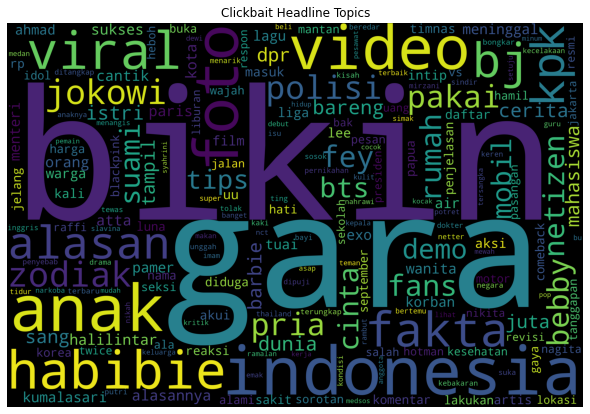

In [31]:
word_cloud(df[df['label_score']==1].title,title = 'Clickbait Headline Topics')

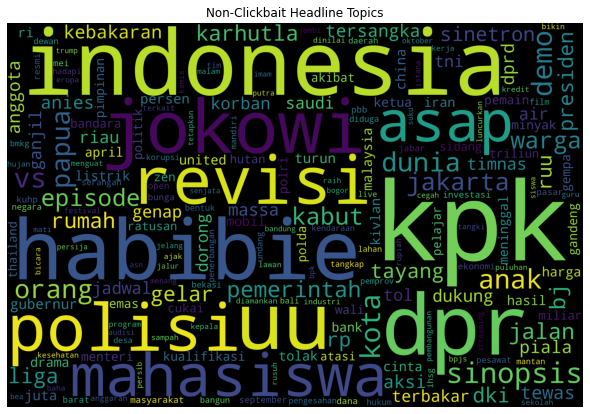

In [32]:
word_cloud(df[df['label_score']==0].title,title = 'Non-Clickbait Headline Topics')

In [33]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
to_del = stopwords + [''] + [x for x in string.punctuation]

def bigram(series,title='',lower=0,upper=10):
    series = series.astype('string')
    to_bigrams = []
    for j in range(len(series)):
      words = word_tokenize(series.iloc[j])
      words = [word.strip(string.punctuation).lower() for word in words ]
      words = [word.strip(string.punctuation).lower() for word in words if word.strip(string.punctuation).lower() not in to_del]
      to_bigrams.append(" ".join(words).replace('"','').replace('`','').replace("'",''))
    bigrams = [j for i in to_bigrams for j in zip(i.split(" ")[:-1], i.split(" ")[1:]) ]
    bigrams = pd.Series(bigrams)
    # plt.figure(figsize=(14,14))
    bar_bigrams = sns.barplot(x=bigrams.value_counts()[lower:upper],y=bigrams.value_counts().index[lower:upper])
    plt.title(title)
    bar_bigrams.get_figure().savefig(title+'.png')
    plt.show()
    


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


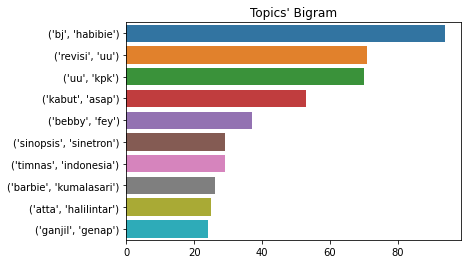

In [34]:
bigram(df.title,title = "Topics' Bigram")

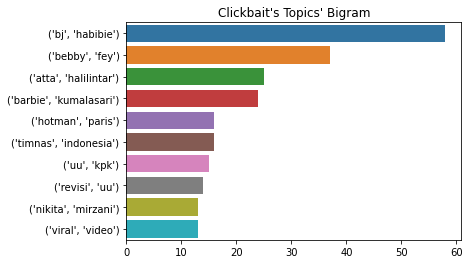

In [35]:
bigram(df[df['label_score']==1].title,title = "Clickbait's Topics' Bigram")

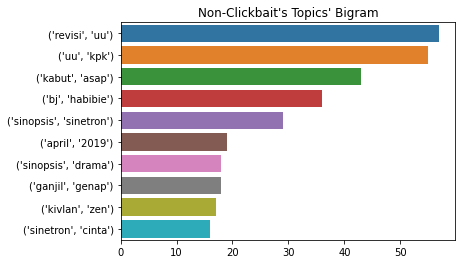

In [36]:
bigram(df[df['label_score']==0].title,title = "Non-Clickbait's Topics' Bigram")

In [37]:
from tqdm import tqdm
def text_size(df,texts='title'):
    sizes = []
    for text in tqdm(df[texts]):
        len_ = len(text.split())
        sizes.append(len_)
    return np.array(sizes)

In [38]:
import plotly.graph_objects as go

In [39]:
df['len_title'] = text_size(df,texts='title')


fake_ = df[df['label_score']==0]
true_ = df[df['label_score']==1]
fig = go.Figure()
fig.add_trace(go.Box(y=list(fake_['len_title']), name='Non-Clickbait',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=list(true_['len_title']), name = 'Clickbait',
                marker_color = 'lightseagreen'))

fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'white',
        'title': 'Box plot',
        
})

fig.show()

100%|██████████| 4244/4244 [00:00<00:00, 590284.73it/s]


In [40]:
nonalphanum = df.copy()
nonalphanum['isalnum'] = nonalphanum['title'].map(lambda x: (x.replace(" ","").isalnum()))
nonalphanum_clickbait = nonalphanum[nonalphanum['label']=='clickbait'].groupby('isalnum').count()
nonalphanum_nonclickbait = nonalphanum[nonalphanum['label']=='non-clickbait'].groupby('isalnum').count()

In [41]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.append_trace(go.Pie(values=[nonalphanum_clickbait.iloc[0]['title'], nonalphanum_clickbait.iloc[1]['title']], 
                        labels=['has special characters','alpha numeric'], hole=.7, 
                        title='clickbait'), row=1, col=1)

fig.append_trace(go.Pie(values=[nonalphanum_nonclickbait.iloc[0]['title'], nonalphanum_nonclickbait.iloc[1]['title']], 
                        labels=['has special characters','alpha numeric'], hole=.7, 
                        title='non-clickbait'), row=1, col=2)
fig.update_traces(marker=dict(colors=['red','lightblue']))
fig.show()